# TASK (PROJECT)

Analysis – obtaining, cleaning and visualising the data. Once you’ve worked through my analysis you should open a dataset for just one of the BRICS capitals: Brasilia, Moscow, Delhi, Beijing or Cape Town, the dataset has been downloaded and can be found in the folder. The choice of capital is up to you. You should then work out the best two weeks, according to the weather, to choose for a two-week holiday in your chosen capital city.

## SOLUTION

### Choice of BRICS : Beijing

In [27]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
beijing = pd.read_csv('Beijing_PEK_2014.csv', skipinitialspace = True)
beijing.head(3)

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,12,4,-2,-12,-17,-20,44,19,7,...,31,11,5,32,16,47.0,0.0,NaN,NaN,291<br />
1,2014-1-2,7,0,-6,-6,-9,-13,74,50,28,...,18,7,3,18,5,NaN,0.0,NaN,NaN,20<br />
2,2014-1-3,9,3,-2,-7,-13,-18,64,32,9,...,31,13,5,18,8,NaN,0.0,NaN,NaN,24<br />


### cleaning the data set

In [4]:
beijing = beijing.rename(columns = {'WindDirDegrees<br />':'WindDirDegrees'}) 

In [5]:
beijing['WindDirDegrees'] = beijing['WindDirDegrees'].str.rstrip('<br />')

In [14]:
beijing['WindDirDegrees'] = beijing['WindDirDegrees'].astype('float64')

In [9]:
beijing = beijing.fillna('')

In [10]:
beijing.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h             object
Precipitationmm               float64
CloudCover                     object
Events                         object
WindDirDegrees                float64
dtype: object

In [15]:
beijing['Date'] = pd.to_datetime(beijing['Date'])

### indexing and sorting the dataframe

In [20]:
beijing.index = beijing['Date']

In [21]:
beijing = beijing.sort_index()

In [22]:
beijing.head(3)

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,12,4,-2,-12,-17,-20,44,19,7,...,31,11,5,32,16,47,0.0,,,291.0
2014-01-02,2014-01-02,7,0,-6,-6,-9,-13,74,50,28,...,18,7,3,18,5,,0.0,,,20.0
2014-01-03,2014-01-03,9,3,-2,-7,-13,-18,64,32,9,...,31,13,5,18,8,,0.0,,,24.0


### FINDING A SUMMER BREAK

trying to find days on which the temperature in warm, ie greater than 25 degrees C

In [25]:
beijing[beijing['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-22,2014-05-22,35,27,19,18,14,8,88,48,12,...,14,4,2,29,11,,0.00,,,167.0
2014-05-23,2014-05-23,34,27,20,16,13,9,73,40,16,...,14,8,5,29,11,40,0.00,,Rain,175.0
2014-05-28,2014-05-28,37,26,15,12,7,1,68,28,6,...,27,19,6,35,10,50,0.00,,,189.0
2014-05-29,2014-05-29,42,30,18,15,11,3,68,33,5,...,31,14,10,21,6,43,0.00,2,,72.0
2014-05-30,2014-05-30,35,28,20,15,13,10,60,37,21,...,13,9,7,21,10,,0.00,,,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-23,2014-08-23,33,27,22,23,21,16,94,69,40,...,10,5,2,26,6,32,0.51,5,Rain-Thunderstorm,155.0
2014-08-24,2014-08-24,33,27,22,20,16,9,88,56,18,...,31,14,6,21,10,29,0.25,1,Rain,39.0
2014-08-26,2014-08-26,36,26,16,15,10,3,83,41,7,...,31,19,6,14,6,21,0.00,,,28.0


the results shows that beijing had a good number of warm days across the months of May through August

## VISUALIZATION

Summer in Beijing spans for 3 months (beginning in **June** and ending in **August**). Thus in line with the task of finding the best 2 weeks for a summer holiday, we focus on this time frame in our dataset

In [28]:
Summer = beijing.loc[datetime(2014,6,1):datetime(2014,8,31)]

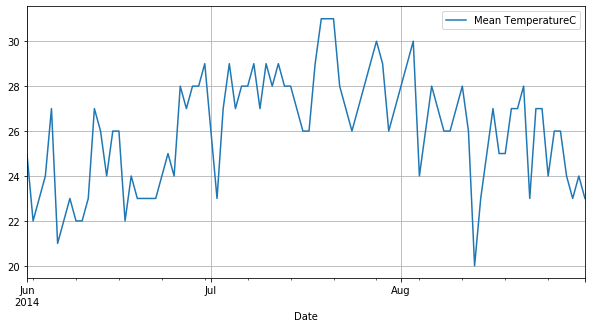

In [40]:
Summer[['Mean TemperatureC']].plot(grid = True, figsize = (10,5))

the entire month of july looks good with mean temperatures > 25 degrees C, with the second half having higher temperature, though i would prefer the first half of july as it has a fairly stable temperature in contrast to the high temperature changes in the second half.

thus lets add precipitation to the plot to get a clearer judgement

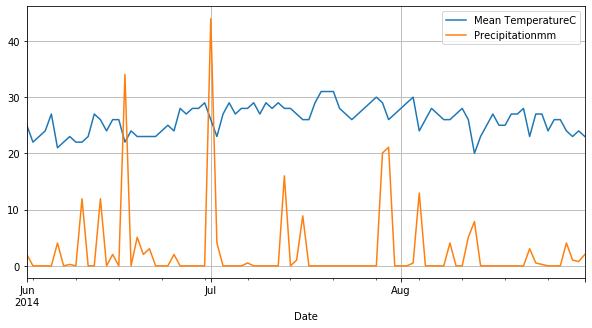

In [41]:
Summer[['Mean TemperatureC','Precipitationmm']].plot(grid = True, figsize = (10,5))

july is still looking pretty good, though there is peaks of rain in the first few days, at the mid and last days of the month. thus, lets take a closer look into the month of july

In [42]:
july = Summer.loc[datetime(2014,7,1):datetime(2014,7,31)]

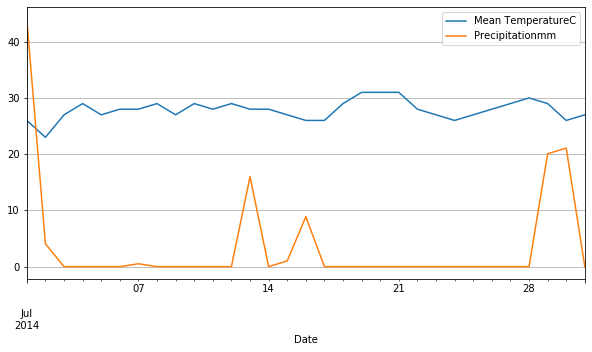

In [44]:
july[['Mean TemperatureC','Precipitationmm']].plot(grid = True, figsize = (10,5))

judging from the clearer chart, it has become evident that the best 2 weeks for a summer trip to beijing lies in the second half of the month of july (14th to 28th). as there are perks of rain in the first 2 days and last 3 days of the first half, but only 3 days of low precipitation between 14 and 28th.